# Programming Exercise 3
# Multi-class Classification and Neural Networks

## Introduction


Trong bài tập này, bạn sẽ thực hiện một hồi quy logistic one-all và neuron networks để nhận biết các chữ số viết tay.Trước khi bắt đầu bài tập lập trình, chúng tôi thực sự khuyên bạn nên xem các bài giảng video và hoàn thành các câu hỏi đánh giá cho các chủ đề liên quan.\
In this exercise, you will implement one-vs-all logistic regression and neural networks to recognize handwritten digits. Before starting the programming exercise, we strongly recommend watching the video lectures and completing the review questions for the associated topics. 

Tất cả các thông tin bạn cần để giải quyết bài tập này nằm trong file notebook này và tất cả các mã bạn sẽ thực hiện sẽ diễn ra trong notebook này.Bài tập có thể submit ngay cho grader của Coursera trực tiếp từ notebook này (mã và hướng dẫn được bao gồm bên dưới).\
All the information you need for solving this assignment is in this notebook, and all the code you will be implementing will take place within this notebook. The assignment can be promptly submitted to the coursera grader directly from this notebook (code and instructions are included below).

Trước khi chúng ta bắt đầu với các bài tập, chúng ta cần import tất cả các thư viện cần thiết cho bài tập lập trình này.Trong suốt khóa học, chúng ta sẽ sử dụng [`numpy`](http://www.numpy.org/) cho tất cả các mảng và thao tác ma trận, [` matplotlib`](https://matplotlib.org/) để vẽ,và [`scipy`](https://docs.scipy.org/doc/scipy/reference/) cho các function và công cụ để tín toán số học và đại số tuyến tính. Bạn có thể tìm thấy hướng dẫn về cách cài đặt các thư viện cần thiết trong tệp readme trong [Kho lưu trữ GitHub](https://github.com/dibgerge/ml-coursera-python-assignments).\
Before we begin with the exercises, we need to import all libraries required for this programming exercise. Throughout the course, we will be using [`numpy`](http://www.numpy.org/) for all arrays and matrix operations, [`matplotlib`](https://matplotlib.org/) for plotting, and [`scipy`](https://docs.scipy.org/doc/scipy/reference/) for scientific and numerical computation functions and tools. You can find instructions on how to install required libraries in the README file in the [github repository](https://github.com/dibgerge/ml-coursera-python-assignments).

In [56]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Plotting library
from matplotlib import pyplot

# Optimization module in scipy
from scipy import optimize

# will be used to load MATLAB mat datafile format
from scipy.io import loadmat

# library written for this exercise providing additional functions for assignment submission, and others
import utils

# define the submission/grader object for this exercise
grader = utils.Grader()

# tells matplotlib to embed plots within the notebook
%matplotlib inline

## Submission and Grading


After completing each part of the assignment, be sure to submit your solutions to the grader. The following is a breakdown of how each part of this exercise is scored.


| Section | Part                                 | Submission function                   |  Points 
| :-      |:-                                    | :-                                    |  :-:    
| 1       | [Regularized Logistic Regression](#section1)     | [`lrCostFunction`](#lrCostFunction)   | 30     
| 2       | [One-vs-all classifier training](#section2)       | [`oneVsAll`](#oneVsAll)               | 20     
| 3       | [One-vs-all classifier prediction](#section3)     | [`predictOneVsAll`](#predictOneVsAll) | 20     
| 4       | [Neural Network Prediction Function](#section4)   | [`predict`](#predict)           | 30
|         | Total Points                         |                                 | 100    


You are allowed to submit your solutions multiple times, and we will take only the highest score into consideration.

<div class="alert alert-block alert-warning">
At the end of each section in this notebook, we have a cell which contains code for submitting the solutions thus far to the grader. Execute the cell to see your score up to the current section. For all your work to be submitted properly, you must execute those cells at least once. They must also be re-executed everytime the submitted function is updated.
</div>

## 1 Multi-class Classification

Đối với bài tập này, bạn sẽ sử dụng hồi quy logistic và mạng lưới thần kinh để nhận biết các chữ số viết tay (từ 0 đến 9).Nhận dạng chữ số viết tay tự động được sử dụng rộng rãi ngày nay - từ việc nhận biết mã zip (mã bưu chính)
trên các phong bì thư đến nhận dạng số tiền được viết trên séc ngân hàng.Bài tập này sẽ chỉ cho bạn cách các phương pháp bạn đã học có thể được sử dụng cho nhiệm vụ phân loại này.\
For this exercise, you will use logistic regression and neural networks to recognize handwritten digits (from 0 to 9). Automated handwritten digit recognition is widely used today - from recognizing zip codes (postal codes)
on mail envelopes to recognizing amounts written on bank checks. This exercise will show you how the methods you have learned can be used for this classification task.

Trong phần đầu tiên của bài tập, bạn sẽ mở rộng triển khai hồi quy logistic trước đó của mình và áp dụng nó vào phân loại one-vs-all.\
In the first part of the exercise, you will extend your previous implementation of logistic regression and apply it to one-vs-all classification.

### 1.1 Dataset

Bạn được cung cấp một tập dữ liệu trong `ex3data1.mat` có chứa 5000 mẫu đào tạo của các chữ số viết tay (đây là tập hợp con của bộ dữ liệu chữ số chữ số [MNIST](http://yann.lecun.com/exdb/mnist).Định dạng `.mat` có nghĩa là dữ liệu đã được lưu ở định dạng ma trận Octave / Matlab gốc, thay vì định dạng văn bản (ASCII) như tệp CSV.Chúng tôi sử dụng định dạng `.mat` ở đây vì đây là bộ dữ liệu được cung cấp trong phiên bản MATLAB của bài tập này.May mắn thay, Python cung cấp các cơ chế để tải định dạng gốc MATLAB bằng chức năng `loadmat` trong mô-đun` scipy.io`. Hàm này trả về một Dictionary của Python với các key chứa các tên biến trong tệp `.mat`.\
You are given a data set in `ex3data1.mat` that contains 5000 training examples of handwritten digits (This is a subset of the [MNIST](http://yann.lecun.com/exdb/mnist) handwritten digit dataset). The `.mat` format means that that the data has been saved in a native Octave/MATLAB matrix format, instead of a text (ASCII) format like a csv-file. We use the `.mat` format here because this is the dataset provided in the MATLAB version of this assignment. Fortunately, python provides mechanisms to load MATLAB native format using the `loadmat` function within the `scipy.io` module. This function returns a python dictionary with keys containing the variable names within the `.mat` file. 

Có 5000 mẫu đào tạo trong `ex3data1.mat`, trong đó mỗi mẫu đào tạo là một ảnh xám (grayscale) chứa một chữ số, kích thước ảnh 20 pixel nhân 20 pixel. Mỗi pixel được đại diện bởi một số dấu phẩy động cho thấy cường độ xám ở vị trí đó. Lưới 20 x 20 pixel được "duỗi" thành một vectơ 400 chiều. Mỗi mẫu đào tạo này trở thành một hàng duy nhất trong Ma trận dữ liệu `X` của chúng tôi. Vậy chúng ta có ma trận `X` kích thước 5000 x 400, trong đó mỗi hàng là một m đào tạo cho một hình ảnh chữ số viết tay.
There are 5000 training examples in `ex3data1.mat`, where each training example is a 20 pixel by 20 pixel grayscale image of the digit. Each pixel is represented by a floating point number indicating the grayscale intensity at that location. The 20 by 20 grid of pixels is “unrolled” into a 400-dimensional vector. Each of these training examples becomes a single row in our data matrix `X`. This gives us a 5000 by 400 matrix `X` where every row is a training example for a handwritten digit image.

$$ X = \begin{bmatrix} - \: (x^{(1)})^T \: - \\ -\: (x^{(2)})^T \:- \\ \vdots \\ - \: (x^{(m)})^T \:-  \end{bmatrix} $$

Phần thứ hai của bộ đào tạo là vectơ 'y' có 5000 chiều, chứa nhãn cho bộ đào tạo.
Đầu tiên, chúng ta bắt đầu bài tập với việc load tập dữ liệu vào. Thực hiện cell bên dưới, bạn không cần phải viết bất kỳ dòng code nào ở đây.
The second part of the training set is a 5000-dimensional vector `y` that contains labels for the training set. 
We start the exercise by first loading the dataset. Execute the cell below, you do not need to write any code here.

In [57]:
# 20x20 Input Images of Digits
input_layer_size  = 400

# 10 labels, from 1 to 10 (note that we have mapped "0" to label 10)
num_labels = 10

#  training data stored in arrays X, y
data = loadmat(os.path.join('Data', 'ex3data1.mat'))
X, y = data['X'], data['y'].ravel()

# set the zero digit to 0, rather than its mapped 10 in this dataset
# This is an artifact due to the fact that this dataset was used in 
# MATLAB where there is no index 0
y[y == 10] = 0

m = y.size

### 1.2 Visualizing the data

Bạn sẽ bắt đầu bằng cách visualize một tập con của bộ đào tạo. Trong cell sau, hàm `np.random.choice` sẽ chọn 100 hàng từ `X` và truyền các hàng đó vào hàm ` displaydata`. Hàm này có nhiệm vụ hiển thị các ảnh xám 20x20 pixel đã được chọn. Chúng tôi đã cung cấp chức năng `displaydata` trong tệp` utils.py`. Bạn được khuyến khích kiểm tra code để xem cách thức hoạt động. Chạy các ô sau để visualize dữ liệu.\
You will begin by visualizing a subset of the training set. In the following cell, the code randomly selects selects 100 rows from `X` and passes those rows to the `displayData` function. This function maps each row to a 20 pixel by 20 pixel grayscale image and displays the images together. We have provided the `displayData` function in the file `utils.py`. You are encouraged to examine the code to see how it works. Run the following cell to visualize the data.

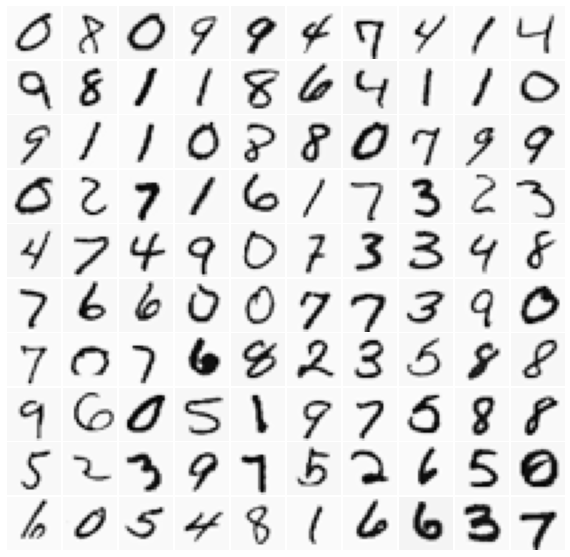

In [58]:
# Randomly select 100 data points to display
rand_indices = np.random.choice(m, 100, replace=False)
sel = X[rand_indices, :]

utils.displayData(sel)

### 1.3 Vectorizing Logistic Regression

Bạn sẽ đang sử dụng nhiều mô hình hồi quy logistic một-tất cả để xây dựng một phân loại nhiều lớp.Vì có 10 lớp, bạn sẽ cần đào tạo 10 phân loại hồi quy logistic riêng biệt.Để thực hiện khóa đào tạo này, điều quan trọng là phải đảm bảo rằng mã của bạn được nhiều mẫu.Trong phần này, bạn sẽ thực hiện một phiên bản Vectorized của hồi quy logistic không sử dụng bất kỳ vòng lặp nào `for`. Bạn có thể sử dụng mã của mình trong bài tập trước đó như một điểm khởi đầu cho bài tập này.\
You will be using multiple one-vs-all logistic regression models to build a multi-class classifier. Since there are 10 classes, you will need to train 10 separate logistic regression classifiers. To make this training efficient, it is important to ensure that your code is well vectorized. In this section, you will implement a vectorized version of logistic regression that does not employ any `for` loops. You can use your code in the previous exercise as a starting point for this exercise. 

Để kiểm tra hồi quy logistic Vectorized, chúng tôi sẽ sử dụng custom data như được định nghĩa trong cell sau.\
To test your vectorized logistic regression, we will use custom data as defined in the following cell.

In [59]:
# test values for the parameters theta
theta_t = np.array([-2, -1, 1, 2], dtype=float)

# test values for the inputs
X_t = np.concatenate([np.ones((5, 1)), np.arange(1, 16).reshape(5, 3, order='F')/10.0], axis=1)

# test values for the labels
y_t = np.array([1, 0, 1, 0, 1])

# test value for the regularization parameter
lambda_t = 3

<a id="section1"></a>
#### 1.3.1 Vectorizing the cost function 

Chúng ta sẽ bắt đầu bằng cách viết một phiên bản vector hóa của hàm chi phí. Nhớ lại rằng trong hồi quy logistic (unregularized), hàm chi phí là\
We will begin by writing a vectorized version of the cost function. Recall that in (unregularized) logistic regression, the cost function is

$$ J(\theta) = \frac{1}{m} \sum_{i=1}^m \left[ -y^{(i)} \log \left( h_\theta\left( x^{(i)} \right) \right) - \left(1 - y^{(i)} \right) \log \left(1 - h_\theta \left( x^{(i)} \right) \right) \right] $$

Để tính toán từng yếu tố trong tổng, chúng ta phải tính $ h_\theta(x^{(i)})$ cho mỗi mẫu $i$, trong đó $h_\theta(x^{(i)}) = g(\theta^T x^{(i)})$ và $g(z) = \frac{1}{1+e^{-z}}$ là hàm sigmoid. Hóa ra chúng ta có thể tính toán nhanh chóng điều này cho tất cả các mẫu của chúng ta bằng cách sử dụng phép nhân Matrix. Chúng ta hãy định nghĩa $X$ và $\theta$ như sau\
To compute each element in the summation, we have to compute $h_\theta(x^{(i)})$ for every example $i$, where $h_\theta(x^{(i)}) = g(\theta^T x^{(i)})$ and $g(z) = \frac{1}{1+e^{-z}}$ is the sigmoid function. It turns out that we can compute this quickly for all our examples by using matrix multiplication. Let us define $X$ and $\theta$ as

$$ X = \begin{bmatrix} - \left( x^{(1)} \right)^T - \\ - \left( x^{(2)} \right)^T - \\ \vdots \\ - \left( x^{(m)} \right)^T - \end{bmatrix} \qquad \text{and} \qquad \theta = \begin{bmatrix} \theta_0 \\ \theta_1 \\ \vdots \\ \theta_n \end{bmatrix} $$

Sau đó, bằng cách tính toán ma trận product $X\theta$, chúng ta có:\
Then, by computing the matrix product $X\theta$, we have: 

$$ X\theta = \begin{bmatrix} - \left( x^{(1)} \right)^T\theta - \\ - \left( x^{(2)} \right)^T\theta - \\ \vdots \\ - \left( x^{(m)} \right)^T\theta - \end{bmatrix} = \begin{bmatrix} - \theta^T x^{(1)}  - \\ - \theta^T x^{(2)} - \\ \vdots \\ - \theta^T x^{(m)}  - \end{bmatrix} $$

Trong dấu bằng cuối cùng, chúng ta đã sử dụng thực tế là $a^Tb = b^Ta$ nếu $a$ và $b$ là vectơ. Điều này cho phép chúng ta tính toán các tích của $\theta^T x^{(i)}$ cho tất cả các mẫu $i$ chỉ trong một dòng code.\
In the last equality, we used the fact that $a^Tb = b^Ta$ if $a$ and $b$ are vectors. This allows us to compute the products $\theta^T x^{(i)}$ for all our examples $i$ in one line of code.

#### 1.3.2 Vectorizing the gradient

Nhớ lại rằng gradient của hồi quy logistic (unregularized) là một vectơ trong đó phần tử $j^{th}$ được xác định là\
Recall that the gradient of the (unregularized) logistic regression cost is a vector where the $j^{th}$ element is defined as

$$ \frac{\partial J }{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^m \left( \left( h_\theta\left(x^{(i)}\right) - y^{(i)} \right)x_j^{(i)} \right) $$

Để vectơ hóa phép tính này qua toàn bộ bộ dữ liệu, chúng ta bắt đầu bằng cách viết ra rõ ràng toàn bộ các đạo hàm riêng từng $\theta_j$,\
To vectorize this operation over the dataset, we start by writing out all the partial derivatives explicitly for all $\theta_j$,

$$
\begin{align*}
\begin{bmatrix} 
\frac{\partial J}{\partial \theta_0} \\
\frac{\partial J}{\partial \theta_1} \\
\frac{\partial J}{\partial \theta_2} \\
\vdots \\
\frac{\partial J}{\partial \theta_n}
\end{bmatrix} = &
\frac{1}{m} \begin{bmatrix}
\sum_{i=1}^m \left( \left(h_\theta\left(x^{(i)}\right) - y^{(i)} \right)x_0^{(i)}\right) \\
\sum_{i=1}^m \left( \left(h_\theta\left(x^{(i)}\right) - y^{(i)} \right)x_1^{(i)}\right) \\
\sum_{i=1}^m \left( \left(h_\theta\left(x^{(i)}\right) - y^{(i)} \right)x_2^{(i)}\right) \\
\vdots \\
\sum_{i=1}^m \left( \left(h_\theta\left(x^{(i)}\right) - y^{(i)} \right)x_n^{(i)}\right) \\
\end{bmatrix} \\
= & \frac{1}{m} \sum_{i=1}^m \left( \left(h_\theta\left(x^{(i)}\right) - y^{(i)} \right)x^{(i)}\right) \\
= & \frac{1}{m} X^T \left( h_\theta(x) - y\right)
\end{align*}
$$

Trong đó

$$  h_\theta(x) - y = 
\begin{bmatrix}
h_\theta\left(x^{(1)}\right) - y^{(1)} \\
h_\theta\left(x^{(2)}\right) - y^{(2)} \\
\vdots \\
h_\theta\left(x^{(m)}\right) - y^{(m)} 
\end{bmatrix} $$

Lưu ý rằng $x^{(i)}$ là một vectơ, trong khi $h_\theta\left (x^{(i)}\right) - y^{(i)}$ là vô hướng (một số duy nhất).
Để hiểu bước cuối cùng của đạo hàm, hãy để $\beta_i = (h_\theta\left(x^{(m)}\right) -y^{(m)})$ và
quan sát rằng:\
Note that $x^{(i)}$ is a vector, while $h_\theta\left(x^{(i)}\right) - y^{(i)}$  is a scalar (single number).
To understand the last step of the derivation, let $\beta_i = (h_\theta\left(x^{(m)}\right) - y^{(m)})$ and
observe that:

$$ \sum_i \beta_ix^{(i)} = \begin{bmatrix} 
| & | & & | \\
x^{(1)} & x^{(2)} & \cdots & x^{(m)} \\
| & | & & | 
\end{bmatrix}
\begin{bmatrix}
\beta_1 \\
\beta_2 \\
\vdots \\
\beta_m
\end{bmatrix} = x^T \beta
$$

Trong trường hợp các giá trị $\beta_i = \left( h_\theta (x^{(i)} - y^{(i)} \right))$.\
where the values $\beta_i = \left( h_\theta(x^{(i)} - y^{(i)} \right))$.

Biểu thức ở trên cho phép chúng ta tính toán tất cả các đạo hàm riêng mà không cần bất kì vòng lặp nào. Nếu bạn hiểu về đại số tuyến tính, chúng tôi khuyến khích bạn sử dụng các phép nhân ma trận ở trên để hiểu rằng phiên bản vector hóa thực hiện các tính toán tương tự.\
The expression above allows us to compute all the partial derivatives
without any loops. If you are comfortable with linear algebra, we encourage you to work through the matrix multiplications above to convince yourself that the vectorized version does the same computations. 

Công việc của bạn là viết hàm chi phí `lrCostFunction` không sử dụng regularized, trả về cả hàm chi phí $J(\theta)$ và gradient $\frac{\partial J} {\partial \theta}$. Việc thực hiện của bạn nên sử dụng phương pháp mà chúng tôi đã trình bày ở trên để tính $\theta^T x^{(i)}$. Bạn cũng nên sử dụng một cách tiếp cận vector hóa cho phần còn lại của hàm chi phí. Một phiên bản hoàn toàn Vector hóa của `lrcostfunction` không chứa bất kỳ vòng lặp nào.\
Your job is to write the unregularized cost function `lrCostFunction` which returns both the cost function $J(\theta)$ and its gradient $\frac{\partial J}{\partial \theta}$. Your implementation should use the strategy we presented above to calculate $\theta^T x^{(i)}$. You should also use a vectorized approach for the rest of the cost function. A fully vectorized version of `lrCostFunction` should not contain any loops.

<div class="alert alert-box alert-warning">
** Mẹo gỡ lỗi: ** Code vectơ đôi khi có thể khó khăn. Một phương pháp phổ biến để gỡ lỗi là in ra kích thước của ma trận bạn đang làm việc với việc sử dụng thuộc tính `shape` của mảng `numpy`. mẫu: với một ma trận dữ liệu $X$ có kích thước $100 \times 20$ (100 mẫu, 20 đặc trưng) và $\theta$, một vectơ với kích thước $20$, bạn có thể thấy rằng `np.dot(X, theta)` là một phép nhân hợp lệ, trong khi `np.dot(theta, X)` thì không. Hơn nữa, nếu bạn có một phiên bản không vector hóa mã của mình, bạn có thể so sánh đầu ra của mã vectơ và mã không được vectơ để đảm bảo rằng chúng tạo ra các đầu ra tương tự.<br>
**Debugging Tip:** Vectorizing code can sometimes be tricky. One common strategy for debugging is to print out the sizes of the matrices you are working with using the `shape` property of `numpy` arrays. For example, given a data matrix $X$ of size $100 \times 20$ (100 examples, 20 features) and $\theta$, a vector with size $20$, you can observe that `np.dot(X, theta)` is a valid multiplication operation, while `np.dot(theta, X)` is not. Furthermore, if you have a non-vectorized version of your code, you can compare the output of your vectorized code and non-vectorized code to make sure that they produce the same outputs.
</div>
<a id="lrCostFunction"></a>

In [60]:
def lrCostFunction(theta, X, y, lambda_):
    """
    Computes the cost of using theta as the parameter for regularized
    logistic regression and the gradient of the cost w.r.t. to the parameters.
    
    Parameters
    ----------
    theta : array_like
        Logistic regression parameters. A vector with shape (n, ). n is 
        the number of features including any intercept.  
    
    X : array_like
        The data set with shape (m x n). m is the number of examples, and
        n is the number of features (including intercept).
    
    y : array_like
        The data labels. A vector with shape (m, ).
    
    lambda_ : float
        The regularization parameter. 
    
    Returns
    -------
    J : float
        The computed value for the regularized cost function. 
    
    grad : array_like
        A vector of shape (n, ) which is the gradient of the cost
        function with respect to theta, at the current values of theta.
    
    Instructions
    ------------
    Compute the cost of a particular choice of theta. You should set J to the cost.
    Compute the partial derivatives and set grad to the partial
    derivatives of the cost w.r.t. each parameter in theta
    
    Hint 1
    ------
    The computation of the cost function and gradients can be efficiently
    vectorized. For example, consider the computation
    
        sigmoid(X * theta)
    
    Each row of the resulting matrix will contain the value of the prediction
    for that example. You can make use of this to vectorize the cost function
    and gradient computations. 
    
    Hint 2
    ------
    When computing the gradient of the regularized cost function, there are
    many possible vectorized solutions, but one solution looks like:
    
        grad = (unregularized gradient for logistic regression)
        temp = theta 
        temp[0] = 0   # because we don't add anything for j = 0
        grad = grad + YOUR_CODE_HERE (using the temp variable)
    
    Hint 3
    ------
    We have provided the implementatation of the sigmoid function within 
    the file `utils.py`. At the start of the notebook, we imported this file
    as a module. Thus to access the sigmoid function within that file, you can
    do the following: `utils.sigmoid(z)`.
    
    """
    #Initialize some useful values
    m = y.size
    
    # convert labels to ints if their type is bool
    if y.dtype == bool:
        y = y.astype(int)
    
    # You need to return the following variables correctly
    J = 0
    grad = np.zeros(theta.shape)
    
    # ====================== YOUR CODE HERE ======================
    # print((theta**2)[0], (theta*theta.T)[0])
    h = 1/(1 + np.exp(-(X@theta))) 
    J = -1/m * np.sum((y*np.log(h) + (1-y)*np.log(1-h))) + lambda_/(2*m) * np.sum((theta**2)[1:])
    
    grad = 1/m * ((h - y)@X)
    grad[1:] = grad[1:] + (lambda_ / m )*theta[1:]
    # =============================================================
    return J, grad

#### 1.3.3 Vectorizing regularized logistic regression

Sau khi bạn đã triển khai vector hóa cho hồi quy logistic, bây giờ bạn sẽ thêm regularize vào hàm chi phí. Nhớ lại rằng để triên khai regularized hồi quy logistic, hàm chi phí được xác định là\
After you have implemented vectorization for logistic regression, you will now add regularization to the cost function. Recall that for regularized logistic regression, the cost function is defined as

$$ J(\theta) = \frac{1}{m} \sum_{i=1}^m \left[ -y^{(i)} \log \left(h_\theta\left(x^{(i)} \right)\right) - \left( 1 - y^{(i)} \right) \log\left(1 - h_\theta \left(x^{(i)} \right) \right) \right] + \frac{\lambda}{2m} \sum_{j=1}^n \theta_j^2 $$

Lưu ý rằng bạn không nên regularize cho BIAS $\theta_0$.
Tương ứng, đạo hàm chi từng phần của regularize hồi quy logistic cost  $\theta_j$ được định nghĩa là\
Note that you should not be regularizing $\theta_0$ which is used for the bias term.
Correspondingly, the partial derivative of regularized logistic regression cost for $\theta_j$ is defined as

$$
\begin{align*}
& \frac{\partial J(\theta)}{\partial \theta_0} = \frac{1}{m} \sum_{i=1}^m \left( h_\theta\left( x^{(i)} \right) - y^{(i)} \right) x_j^{(i)}  & \text{for } j = 0 \\
& \frac{\partial J(\theta)}{\partial \theta_j} = \left( \frac{1}{m} \sum_{i=1}^m \left( h_\theta\left( x^{(i)} \right) - y^{(i)} \right) x_j^{(i)} \right) + \frac{\lambda}{m} \theta_j & \text{for } j  \ge 1
\end{align*}$$


Bây giờ Sửa đổi mã của bạn trong `lrCostFunction` trong [**cell trước**](#lrCostFunction) để tính regularize. Một lần nữa, bạn không nên đặt bất kỳ vòng lặp nào vào code của mình.\
Now modify your code in `lrCostFunction` in the [**previous cell**](#lrCostFunction) to account for regularization. Once again, you should not put any loops into your code.

<div class="alert alert-box alert-warning">
** Mẹo Python / Numpy: ** Khi triển khai vector hóa cho regularize hồi quy logistic, bạn có thể chỉ muốn chỉ tổng hợp và cập nhật các yếu tố nhất định là $\theta$. Trong `numpy`, bạn có thể lập chỉ mục vào ma trận để truy cập và chỉ cập nhật các yếu tố nhất định. Ví dụ: A [:, 3:5]= B[:, 1:3] sẽ thay thế các cột có chỉ mục 3 đến 5 của A với các cột có chỉ mục 1 đến 3 của B. Để chọn cột (hoặc hàng) cho đến khi kết thúc ma trận, bạn có thể rời khỏi bên phải bên tay của đại tràng trống. Ví dụ: một [:, 2:] sẽ chỉ trả về các phần tử từ $ 3 ^ {RD} $ sang các cột cuối cùng là $ A $. Nếu bạn để kích thước tay trái của dấu hai chấm, bạn sẽ chọn các phần tử từ đầu ma trận. Ví dụ: một [:,: 2] chọn hai cột đầu tiên và tương đương với [:, 0: 2]. Ngoài ra, bạn có thể sử dụng các chỉ số âm cho các mảng chỉ mục từ cuối. Do đó, một [:,: -1] chọn tất cả các cột của A ngoại trừ cột cuối cùng và [:, -5:] chọn cột $ 5 ^ {th} $ từ cuối đến cột cuối cùng. Do đó, bạn có thể sử dụng điều này cùng với các hoạt động SUM và POWER ($ ^} $) để tính tổng các phần tử bạn quan tâm (ví dụ: `np.sum (z [1:] ** 2 ) `). Trong mã Starter, `lrcostfunction`, chúng tôi cũng đã cung cấp các gợi ý về một phương pháp có thể tính được tính toán độ dốc chính quy.\
**python/numpy Tip:** When implementing the vectorization for regularized logistic regression, you might often want to only sum and update certain elements of $\theta$. In `numpy`, you can index into the matrices to access and update only certain elements. For example, A[:, 3:5]
= B[:, 1:3] will replaces the columns with index 3 to 5 of A with the columns with index 1 to 3 from B. To select columns (or rows) until the end of the matrix, you can leave the right hand side of the colon blank. For example, A[:, 2:] will only return elements from the $3^{rd}$ to last columns of $A$. If you leave the left hand size of the colon blank, you will select elements from the beginning of the matrix. For example, A[:, :2] selects the first two columns, and is equivalent to A[:, 0:2]. In addition, you can use negative indices to index arrays from the end. Thus, A[:, :-1] selects all columns of A except the last column, and A[:, -5:] selects the $5^{th}$ column from the end to the last column. Thus, you could use this together with the sum and power ($^{**}$) operations to compute the sum of only the elements you are interested in (e.g., `np.sum(z[1:]**2)`). In the starter code, `lrCostFunction`, we have also provided hints on yet another possible method computing the regularized gradient.
</div>

Khi bạn đã hoàn tất việc triển khai, bạn có thể gọi hàm `lrcostfunction` để kiểm tra giải pháp của mình bằng ô sau:\
Once you finished your implementation, you can call the function `lrCostFunction` to test your solution using the following cell:

In [61]:
J, grad = lrCostFunction(theta_t, X_t, y_t, lambda_t)

print('Cost         : {:.6f}'.format(J))
print('Expected cost: 2.534819')
print('-----------------------')
print('Gradients:')
print(' [{:.6f}, {:.6f}, {:.6f}, {:.6f}]'.format(*grad))
print('Expected gradients:')
print(' [0.146561, -0.548558, 0.724722, 1.398003]');

Cost         : 2.534819
Expected cost: 2.534819
-----------------------
Gradients:
 [0.146561, -0.548558, 0.724722, 1.398003]
Expected gradients:
 [0.146561, -0.548558, 0.724722, 1.398003]


After completing a part of the exercise, you can submit your solutions for grading by first adding the function you modified to the submission object, and then sending your function to Coursera for grading. 

The submission script will prompt you for your login e-mail and submission token. You can obtain a submission token from the web page for the assignment. You are allowed to submit your solutions multiple times, and we will take only the highest score into consideration.

*Execute the following cell to grade your solution to the first part of this exercise.*

In [62]:
# appends the implemented function in part 1 to the grader object
grader[1] = lrCostFunction

# send the added functions to coursera grader for getting a grade on this part
grader.grade()


Submitting Solutions | Programming Exercise multi-class-classification-and-neural-networks

                                  Part Name |     Score | Feedback
                                  --------- |     ----- | --------
         Neural Network Prediction Function |  30 /  30 | Nice work!
            Regularized Logistic Regression |   0 /  20 | Your answer is incorrect.
             One-vs-All Classifier Training |   0 /  20 | Your answer is incorrect.
           One-vs-All Classifier Prediction |   0 /  30 | Your answer is incorrect.
                                  --------------------------------
                                            |  30 / 100 |  



<a id="section2"></a>
### 1.4 One-vs-all Classification

Trong phần này của bài tập, bạn sẽ thực hiện One-Vs-All classifitation bằng cách đào tạo multiple regularized logistic regression classifiers, một cho mỗi lớp $K$ trong bộ dữ liệu của chúng tôi. Trong bộ dữ liệu chữ số viết tay, $K = 10$, nhưng code của bạn nen hoạt động với bất kỳ giá trị $K$ nào.\
In this part of the exercise, you will implement one-vs-all classification by training multiple regularized logistic regression classifiers, one for each of the $K$ classes in our dataset. In the handwritten digits dataset, $K = 10$, but your code should work for any value of $K$. 

Bây giờ bạn sẽ hoàn thành mã cho hàm `onevsAll` bên dưới, để đào tạo một classifier cho mỗi lớp. Cụ thể, mã của bạn sẽ trả về tất cả các tham số cua classifier trong ma trận $\theta \in \mathbb{R}^{K \times (N + 1)}$, trong đó mỗi hàng $\theta$ tương ứng với tham số hồi quy tuyên tính cho một lớp dã hoc. Bạn có thể làm điều này với một "for" - loop từ $0$ đến $K-1$, dào tạo từng classifier một cách độc lập.\
You should now complete the code for the function `oneVsAll` below, to train one classifier for each class. In particular, your code should return all the classifier parameters in a matrix $\theta \in \mathbb{R}^{K \times (N +1)}$, where each row of $\theta$ corresponds to the learned logistic regression parameters for one class. You can do this with a “for”-loop from $0$ to $K-1$, training each classifier independently.

Lưu ý rằng đối số `y` cho function này là một vectơ labels từ 0 đến 9. Khi đào tạo classifier cho lớp $k \in \{0, ..., K-1\}$, bạn sẽ muốn có K-dimensional vectơ của nhãn $y$, trong đó $y_j \in 0, 1$ cho biết liệu trường hợp đào tạo $j^{th}$ có thuộc về lơp $k$ $(y_j = 1)$ hoặc nếu nó thuộc về một lớp khác $(y_j = 0)$. Bạn có thể tìm thấy các mảng logic hữu ích cho nhiệm vụ này.\
Note that the `y` argument to this function is a vector of labels from 0 to 9. When training the classifier for class $k \in \{0, ..., K-1\}$, you will want a K-dimensional vector of labels $y$, where $y_j \in 0, 1$ indicates whether the $j^{th}$ training instance belongs to class $k$ $(y_j = 1)$, or if it belongs to a different class $(y_j = 0)$. You may find logical arrays helpful for this task. 

Hơn nữa, bạn sẽ sử dụng scipy `optimize.minimize` cho bài tập này.\
Furthermore, you will be using scipy's `optimize.minimize` for this exercise. 
<a id="oneVsAll"></a>

In [63]:
def oneVsAll(X, y, num_labels, lambda_):
    """
    Trains num_labels logistic regression classifiers and returns
    each of these classifiers in a matrix all_theta, where the i-th
    row of all_theta corresponds to the classifier for label i.

    Parameters
    ----------
    X : array_like
        The input dataset of shape (m x n). m is the number of 
        data points, and n is the number of features. Note that we 
        do not assume that the intercept term (or bias) is in X, however
        we provide the code below to add the bias term to X. 

    y : array_like
        The data labels. A vector of shape (m, ).

    num_labels : int
        Number of possible labels.

    lambda_ : float
        The logistic regularization parameter.

    Returns
    -------
    all_theta : array_like
        The trained parameters for logistic regression for each class.
        This is a matrix of shape (K x n+1) where K is number of classes
        (ie. `numlabels`) and n is number of features without the bias.

    Instructions
    ------------
    You should complete the following code to train `num_labels`
    logistic regression classifiers with regularization parameter `lambda_`. 

    Hint
    ----
    You can use y == c to obtain a vector of 1's and 0's that tell you
    whether the ground truth is true/false for this class.

    Note
    ----
    For this assignment, we recommend using `scipy.optimize.minimize(method='CG')`
    to optimize the cost function. It is okay to use a for-loop 
    (`for c in range(num_labels):`) to loop over the different classes.

    Example Code
    ------------

        # Set Initial theta
        initial_theta = np.zeros(n + 1)

        # Set options for minimize
        options = {'maxiter': 50}

        # Run minimize to obtain the optimal theta. This function will 
        # return a class object where theta is in `res.x` and cost in `res.fun`
        res = optimize.minimize(lrCostFunction, 
                                initial_theta, 
                                (X, (y == c), lambda_), 
                                jac=True, 
                                method='TNC',
                                options=options) 
    """
    # Some useful variables
    m, n = X.shape

    # You need to return the following variables correctly
    # all_theta = np.zeros((num_labels, n + 1))

    # Add ones to the X data matrix
    X = np.concatenate([np.ones((m, 1)), X], axis=1)

    # ====================== YOUR CODE HERE ======================
    all_theta = np.array([optimize.minimize(lrCostFunction,
                                            np.zeros(n+1),
                                            (X, (y == c).astype(bool), lambda_),
                                            jac=True,
                                            method='CG',
                                            options={'maxiter': 50}).x
                          for c in range(num_labels)])

    # ============================================================
    return all_theta


Sau khi bạn đã hoàn thành mã cho `oneVsAll`, cell sau sẽ sử dụng việc triển khai của bạn để đào tạo phân loại nhiều lớp.\
After you have completed the code for `oneVsAll`, the following cell will use your implementation to train a multi-class classifier. 

In [64]:
lambda_ = 0.1
all_theta = oneVsAll(X, y, num_labels, lambda_)

*You should now submit your solutions.*

In [65]:
grader[2] = oneVsAll
grader.grade()


Submitting Solutions | Programming Exercise multi-class-classification-and-neural-networks

                                  Part Name |     Score | Feedback
                                  --------- |     ----- | --------
         Neural Network Prediction Function |  30 /  30 | Nice work!
            Regularized Logistic Regression |  20 /  20 | Nice work!
             One-vs-All Classifier Training |   0 /  20 | Your answer is incorrect.
           One-vs-All Classifier Prediction |   0 /  30 | Your answer is incorrect.
                                  --------------------------------
                                            |  50 / 100 |  



<a id="section3"></a>
#### 1.4.1 One-vs-all Prediction

Sau khi đào tạo One-Vs-All classifier, giờ đây bạn có thể sử dụng nó để dự đoán chữ số chứa trong một hình ảnh nhất định.Đối với mỗi đầu vào, bạn nên tính toán xác suất của nó doi voi từng lớp bằng cách sử dụng các phân loại hồi quy logistic được đào tạo.Ham dự đoán One-Vs-All của bạn sẽ chọn lớp mà bộ phân loại hồi quy logistic tương ứng đầu ra xác suất cao nhất và trả về nhãn Lớp (0, 1, ..., K-1) là dự đoán cho mau đầu vào.Bây giờ bạn sẽ hoàn thành mã trong hàm `predictonevsall` để sử dụng bộ phân loại one-for-all để đưa ra dự đoán.\
After training your one-vs-all classifier, you can now use it to predict the digit contained in a given image. For each input, you should compute the “probability” that it belongs to each class using the trained logistic regression classifiers. Your one-vs-all prediction function will pick the class for which the corresponding logistic regression classifier outputs the highest probability and return the class label (0, 1, ..., K-1) as the prediction for the input example. You should now complete the code in the function `predictOneVsAll` to use the one-vs-all classifier for making predictions. 
<a id="predictOneVsAll"></a>

In [66]:
def predictOneVsAll(all_theta, X):
    """
    Return a vector of predictions for each example in the matrix X. 
    Note that X contains the examples in rows. all_theta is a matrix where
    the i-th row is a trained logistic regression theta vector for the 
    i-th class. You should set p to a vector of values from 0..K-1 
    (e.g., p = [0, 2, 0, 1] predicts classes 0, 2, 0, 1 for 4 examples) .
    
    Parameters
    ----------
    all_theta : array_like
        The trained parameters for logistic regression for each class.
        This is a matrix of shape (K x n+1) where K is number of classes
        and n is number of features without the bias.
    
    X : array_like
        Data points to predict their labels. This is a matrix of shape 
        (m x n) where m is number of data points to predict, and n is number 
        of features without the bias term. Note we add the bias term for X in 
        this function. 
    
    Returns
    -------
    p : array_like
        The predictions for each data point in X. This is a vector of shape (m, ).
    
    Instructions
    ------------
    Complete the following code to make predictions using your learned logistic
    regression parameters (one-vs-all). You should set p to a vector of predictions
    (from 0 to num_labels-1).
    
    Hint
    ----
    This code can be done all vectorized using the numpy argmax function.
    In particular, the argmax function returns the index of the max element,
    for more information see '?np.argmax' or search online. If your examples
    are in rows, then, you can use np.argmax(A, axis=1) to obtain the index 
    of the max for each row.
    """
    m = X.shape[0];
    num_labels = all_theta.shape[0]

    # You need to return the following variables correctly 
    # p = np.zeros(m)

    # Add ones to the X data matrix
    X = np.concatenate([np.ones((m, 1)), X], axis=1)

    # ====================== YOUR CODE HERE ======================
    p = np.argmax(X@all_theta.T, 1)

    
    # ============================================================
    return p

Khi bạn đã hoàn tất, hãy gọi chức năng `predictonvsall` của bạn bằng cách sử dụng giá trị đã học là $ \ theta $.Bạn sẽ thấy rằng độ chính xác của bộ đào tạo là khoảng 95,1% (tức là, nó phân loại 95,1% các ví dụ trong bộ đào tạo chính xác).
Once you are done, call your `predictOneVsAll` function using the learned value of $\theta$. You should see that the training set accuracy is about 95.1% (i.e., it classifies 95.1% of the examples in the training set correctly).

In [67]:
pred = predictOneVsAll(all_theta, X)
print('Training Set Accuracy: {:.2f}%'.format(np.mean(pred == y) * 100))

Training Set Accuracy: 95.04%


*You should now submit your solutions.*

In [68]:
grader[3] = predictOneVsAll
grader.grade()


Submitting Solutions | Programming Exercise multi-class-classification-and-neural-networks

                                  Part Name |     Score | Feedback
                                  --------- |     ----- | --------
         Neural Network Prediction Function |  30 /  30 | Nice work!
            Regularized Logistic Regression |  20 /  20 | Nice work!
             One-vs-All Classifier Training |  20 /  20 | Nice work!
           One-vs-All Classifier Prediction |   0 /  30 | Your answer is incorrect.
                                  --------------------------------
                                            |  70 / 100 |  



## 2 Neural Networks

Trong phần trước của bài tập này, bạn đã triển khai hồi quy logistic nhiều lớp để nhận biết các chữ số viết tay.Tuy nhiên, hồi quy logistic không thể hình thành các giả thuyết phức tạp hơn vì nó chỉ là một phân loại tuyến tính (bạn có thể thêm nhiều tính năng hơn - chẳng hạn như các tính năng đa thức - đến hồi quy logistic, nhưng điều đó có thể rất tốn kém để đào tạo).\
In the previous part of this exercise, you implemented multi-class logistic regression to recognize handwritten digits. However, logistic regression cannot form more complex hypotheses as it is only a linear classifier (You could add more features - such as polynomial features - to logistic regression, but that can be very expensive to train).

Trong phần này của bài tập, bạn sẽ thực hiện một mạng lưới thần kinh để nhận biết các chữ số viết tay bằng cách sử dụng cùng một tập huấn luyện như trước.Mạng lưới thần kinh sẽ có thể thể hiện các mô hình phức tạp hình thành các giả thuyết phi tuyến tính.Trong tuần này, bạn sẽ sử dụng các tham số từ một mạng lưới thần kinh mà chúng tôi đã được đào tạo.Mục tiêu của bạn là thực hiện thuật toán lan truyền FeedForward để sử dụng trọng lượng của chúng tôi để dự đoán.Trong bài tập trong tuần tới, bạn sẽ viết thuật toán backpropagation để tìm hiểu các thông số mạng thần kinh.\
In this part of the exercise, you will implement a neural network to recognize handwritten digits using the same training set as before. The neural network will be able to represent complex models that form non-linear hypotheses. For this week, you will be using parameters from a neural network that we have already trained. Your goal is to implement the feedforward propagation algorithm to use our weights for prediction. In next week’s exercise, you will write the backpropagation algorithm for learning the neural network parameters. 

Chúng tôi bắt đầu bằng cách tải lại lần đầu tiên và hình dung Dataset chứa các chữ số viết tay MNIST (điều này giống như chúng ta đã làm trong phần đầu tiên của bài tập này, chúng tôi sẽ tải lại ở đây để đảm bảo các biến chưa được sửa đổi).\
We start by first reloading and visualizing the dataset which contains the MNIST handwritten digits (this is the same as we did in the first part of this exercise, we reload it here to ensure the variables have not been modified). 

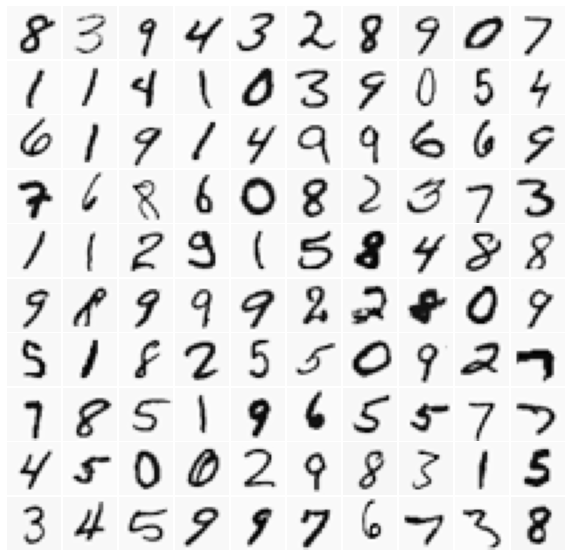

In [69]:
#  training data stored in arrays X, y
data = loadmat(os.path.join('Data', 'ex3data1.mat'))
X, y = data['X'], data['y'].ravel()

# set the zero digit to 0, rather than its mapped 10 in this dataset
# This is an artifact due to the fact that this dataset was used in 
# MATLAB where there is no index 0
y[y == 10] = 0

# get number of examples in dataset
m = y.size

# randomly permute examples, to be used for visualizing one 
# picture at a time
indices = np.random.permutation(m)

# Randomly select 100 data points to display
rand_indices = np.random.choice(m, 100, replace=False)
sel = X[rand_indices, :]

utils.displayData(sel)


### 2.1 Model representation 

Mạng thần kinh của chúng tôi được thể hiện trong hình dưới đây.\
Our neural network is shown in the following figure.

![Neural network](Figures/neuralnetwork.png)

Nó có 3 lớp: một lớp đầu vào, một lớp ẩn và một lớp đầu ra.Nhớ lại rằng các đầu vào của chúng tôi là các giá trị pixel của hình ảnh chữ số.Vì hình ảnh có kích thước 20 × 20, điều này cung cấp cho chúng ta 400 đơn vị lớp đầu vào (không bao gồm bộ phận Bias bổ sung luôn xuất +1).Như trước đây, dữ liệu đào tạo sẽ được tải vào các biến x và y.\
It has 3 layers: an input layer, a hidden layer and an output layer. Recall that our inputs are pixel values of digit images. Since the images are of size 20×20, this gives us 400 input layer units (excluding the extra bias unit which always outputs +1). As before, the training data will be loaded into the variables X and y. 

Bạn đã được cung cấp một tập hợp các tham số mạng ($ \ theta ^ {(1)} $, $ \ theta ^ {(2)} $) đã được chúng tôi đào tạo.Chúng được lưu trữ trong `ex3 weights.mat`.Các ô sau đây tải các tham số đó vào `theta1` và` theta2`.Các tham số có kích thước có kích thước cho một mạng thần kinh với 25 đơn vị trong lớp thứ hai và 10 đơn vị đầu ra (tương ứng với các lớp gồm 10 chữ số).\
You have been provided with a set of network parameters ($\Theta^{(1)}$, $\Theta^{(2)}$) already trained by us. These are stored in `ex3weights.mat`. The following cell loads those parameters into  `Theta1` and `Theta2`. The parameters have dimensions that are sized for a neural network with 25 units in the second layer and 10 output units (corresponding to the 10 digit classes).

In [70]:
# Setup the parameters you will use for this exercise
input_layer_size  = 400  # 20x20 Input Images of Digits
hidden_layer_size = 25   # 25 hidden units
num_labels = 10          # 10 labels, from 0 to 9

# Load the .mat file, which returns a dictionary 
weights = loadmat(os.path.join('Data', 'ex3weights.mat'))

# get the model weights from the dictionary
# Theta1 has size 25 x 401
# Theta2 has size 10 x 26
Theta1, Theta2 = weights['Theta1'], weights['Theta2']

# swap first and last columns of Theta2, due to legacy from MATLAB indexing, 
# since the weight file ex3weights.mat was saved based on MATLAB indexing
Theta2 = np.roll(Theta2, 1, axis=0)

<a id="section4"></a>
### 2.2 Feedforward Propagation and Prediction

Bây giờ bạn sẽ thực hiện nhân feedforward propagation cho mạng lưới thần kinh. Bạn sẽ cần hoàn thành mã trong hàm `predict` để trả về dự đoán của mạng thần kinh. Bạn nên thực hiện FeedForward tính toán $h_\theta(x^{(i)})$ cho mỗi mau $ i$ và trả về các dự đoán liên quan. Tương tự như phân loại One-Vs-All, dự đoán từ mạng lưới thần kinh sẽ là nhãn hiệu có đầu ra lớn nhất $\left( h_\theta(x) \right)_k$.\
Now you will implement feedforward propagation for the neural network. You will need to complete the code in the function `predict` to return the neural network’s prediction. You should implement the feedforward computation that computes $h_\theta(x^{(i)})$ for every example $i$ and returns the associated predictions. Similar to the one-vs-all classification strategy, the prediction from the neural network will be the label that has the largest output $\left( h_\theta(x) \right)_k$.

<div class="alert alert-box alert-warning">
** LƯU Ý THỰC HIỆN: ** MATRIX $X$ chứa các mau trong các hàng. Khi bạn hoàn thành mã trong hàm `predict`, bạn sẽ cần thêm cột 1 của vào ma trận. Các ma trận `theta1` và` theta2` chứa các tham số cho mỗi đơn vị trong hàng.Cụ thể, hàng đầu tiên của `theta1` tương ứng với đơn vị ẩn đầu tiên trong lớp thứ hai.Trong `numpy`, khi bạn tính toán $ z ^ {(2)} = \ theta ^ {(1)} A ^ {(1)} $, hãy chắc chắn rằng bạn lập chỉ mục (và nếu cần, Transpose) chính xác $ X $để bạn nhận được $ a ^ {(l)} $ làm véc tơ 1-D.
**Implementation Note:** The matrix $X$ contains the examples in rows. When you complete the code in the function `predict`, you will need to add the column of 1’s to the matrix. The matrices `Theta1` and `Theta2` contain the parameters for each unit in rows. Specifically, the first row of `Theta1` corresponds to the first hidden unit in the second layer. In `numpy`, when you compute $z^{(2)} = \theta^{(1)}a^{(1)}$, be sure that you index (and if necessary, transpose) $X$ correctly so that you get $a^{(l)}$ as a 1-D vector.
</div>
<a id="predict"></a>

In [71]:
def predict(Theta1, Theta2, X):
    """
    Predict the label of an input given a trained neural network.
    
    Parameters
    ----------
    Theta1 : array_like
        Weights for the first layer in the neural network.
        It has shape (2nd hidden layer size x input size)
    
    Theta2: array_like
        Weights for the second layer in the neural network. 
        It has shape (output layer size x 2nd hidden layer size)
    
    X : array_like
        The image inputs having shape (number of examples x image dimensions).
    
    Return 
    ------
    p : array_like
        Predictions vector containing the predicted label for each example.
        It has a length equal to the number of examples.
    
    Instructions
    ------------
    Complete the following code to make predictions using your learned neural
    network. You should set p to a vector containing labels 
    between 0 to (num_labels-1).
     
    Hint
    ----
    This code can be done all vectorized using the numpy argmax function.
    In particular, the argmax function returns the index of the  max element,
    for more information see '?np.argmax' or search online. If your examples
    are in rows, then, you can use np.argmax(A, axis=1) to obtain the index
    of the max for each row.
    
    Note
    ----
    Remember, we have supplied the `sigmoid` function in the `utils.py` file. 
    You can use this function by calling `utils.sigmoid(z)`, where you can 
    replace `z` by the required input variable to sigmoid.
    """
    # Make sure the input has two dimensions
    if X.ndim == 1:
        X = X[None]  # promote to 2-dimensions
    
    # useful variables
    m = X.shape[0]
    num_labels = Theta2.shape[0]

    # You need to return the following variables correctly 
    p = np.zeros(X.shape[0])

    # ====================== YOUR CODE HERE ======================
    X = np.concatenate([np.ones((m, 1)), X], axis=1)
    # print(np.concatenate([np.ones((m, 1)), X@Theta1.T], axis=1).shape)
    p = np.argmax(utils.sigmoid(np.concatenate([np.ones((m, 1)), utils.sigmoid(X@Theta1.T)], axis=1)@Theta2.T), axis=1)
    # =============================================================
    return p

Khi bạn đã hoàn tất, hãy gọi hàm dự đoán của bạn bằng cách sử dụng tập hợp các tham số được tải cho `theta1` và` theta2`.Bạn sẽ thấy rằng độ chính xác là khoảng 97,5%.\
Once you are done, call your predict function using the loaded set of parameters for `Theta1` and `Theta2`. You should see that the accuracy is about 97.5%.

In [72]:
pred = predict(Theta1, Theta2, X)
print('Training Set Accuracy: {:.1f}%'.format(np.mean(pred == y) * 100))

Training Set Accuracy: 97.5%


Sau đó, chúng ta sẽ hiển thị hình ảnh từ tập luyện một lần, đồng thời in ra nhãn dự đoán cho hình ảnh được hiển thị.\
After that, we will display images from the training set one at a time, while at the same time printing out the predicted label for the displayed image. 

Chạy các ô sau để hiển thị một hình ảnh duy nhất dự đoán của mạng thần kinh.Bạn có thể chạy ô nhiều thời gian để xem dự đoán cho các hình ảnh khác nhau.\
Run the following cell to display a single image the the neural network's prediction. You can run the cell multiple time to see predictions for different images.

Neural Network Prediction: 5


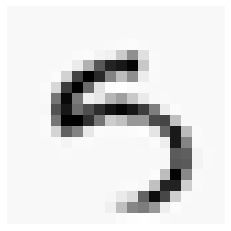

In [73]:
if indices.size > 0:
    i, indices = indices[0], indices[1:]
    utils.displayData(X[i, :], figsize=(4, 4))
    pred = predict(Theta1, Theta2, X[i, :])
    print('Neural Network Prediction: {}'.format(*pred))
else:
    print('No more images to display!')

*You should now submit your solutions.*

In [74]:
grader[4] = predict
grader.grade()


Submitting Solutions | Programming Exercise multi-class-classification-and-neural-networks

                                  Part Name |     Score | Feedback
                                  --------- |     ----- | --------
         Neural Network Prediction Function |  30 /  30 | Nice work!
            Regularized Logistic Regression |  20 /  20 | Nice work!
             One-vs-All Classifier Training |  20 /  20 | Nice work!
           One-vs-All Classifier Prediction |  30 /  30 | Nice work!
                                  --------------------------------
                                            | 100 / 100 |  

